# Fashion Item Image Recognition & Classification
#### Andrea Brennan 03/06/2022
Additional coding references from: 
* https://www.tensorflow.org/tutorials/keras/classification
* https://www.analyticsvidhya.com/blog/2022/01/image-classification-using-machine-learning/ 

# APPROACH 1: Keras Neural Network
## Load Libraries

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # show all results for cell
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf # TensorFlow and tf.keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

### Import Fashion Data

In [ ]:
df = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = df.load_data()

In [ ]:
# Create Class Names for labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Eplore the Data

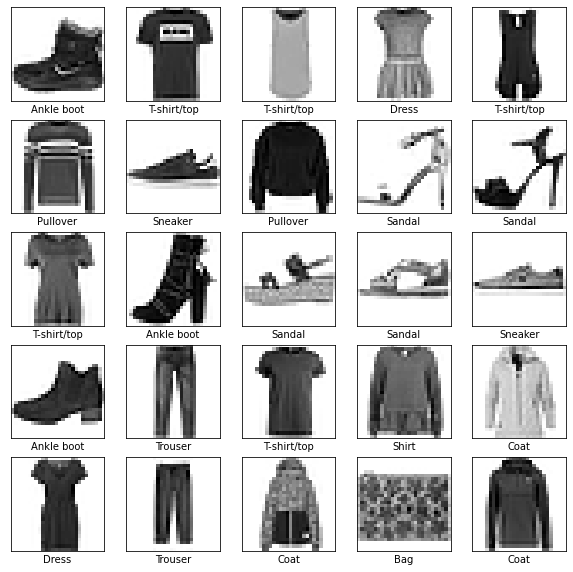

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show();

<Figure size 432x288 with 0 Axes>

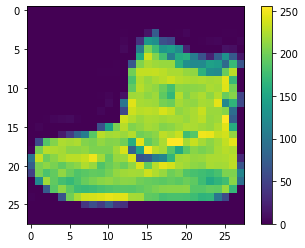

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

### Preprocess to convert values to range from 0 - 1.

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Build the Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Train

In [ ]:
early_stopping = es = EarlyStopping(monitor='accuracy', patience=2)

model.fit(train_images, train_labels, epochs=50, callbacks=[early_stopping])

Epoch 1/50
1875/1875 [==============================] - 15s 7ms/step - loss: 0.4925 - accuracy: 0.8271
Epoch 2/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3683 - accuracy: 0.8657
Epoch 3/50
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3333 - accuracy: 0.8782
Epoch 4/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3108 - accuracy: 0.8848
Epoch 5/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2911 - accuracy: 0.8930
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2776 - accuracy: 0.8971
Epoch 7/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2655 - accuracy: 0.9015
Epoch 8/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2559 - accuracy: 0.9038
Epoch 9/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2462 - accuracy: 0.9086
Epoch 10/50
1875/1875 [==============================] - 6s 3ms/step - loss: 

### Show Accuracy

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
nn_accuracy = round((test_accuracy) * 100, 2)
print ('\nTest Accuracy:', nn_accuracy, '%')

313/313 - 1s - loss: 0.5246 - accuracy: 0.8865 - 583ms/epoch - 2ms/step

Test Accuracy: 88.65 %



# APPROACH 2: Random Forest Classification

In [ ]:
# convert images from 3D to 2D
# train_images.shape
nsamples, nx, ny = train_images.shape
train_images2D = train_images.reshape((nsamples,nx*ny))
# train_images2D.shape

print('\n')

nsamples, nx, ny = test_images.shape
test_images2D = test_images.reshape((nsamples,nx*ny))
# test_images2D.shape


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
RFmodel = RandomForestClassifier()
RFmodel.fit(train_images2D, train_labels) 

RandomForestClassifier()

In [ ]:
test_pred = RFmodel.predict(test_images2D)
test_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
random_forest_accuracy = round(accuracy_score(test_pred, test_labels), 2)*100
print ('Random Forest Prediction Accuracy:', random_forest_accuracy, '%')

Random Forest Prediction Accuracy: 88.0 %


# APPROACH 3: KNN Image Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

### Elbow Plot to Identify N_Neighbors Hyperparameter
*Code referenced: https://medium.com/@moussadoumbia_90919/elbow-method-in-supervised-learning-optimal-k-value-99d425f229e7*

In [ ]:
error_rate = []

K = range(1,10)
for k in K:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_images2D,train_labels)
    pred_i = knn.predict(test_images2D)
    error_rate.append(np.mean(pred_i != test_labels))


KNeighborsClassifier(n_neighbors=1)

KNeighborsClassifier(n_neighbors=2)

KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier(n_neighbors=4)

KNeighborsClassifier()

KNeighborsClassifier(n_neighbors=6)

KNeighborsClassifier(n_neighbors=7)

KNeighborsClassifier(n_neighbors=8)

KNeighborsClassifier(n_neighbors=9)

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Error Rate vs. K Value')

Text(0.5, 0, 'K')

Text(0, 0.5, 'Error Rate')

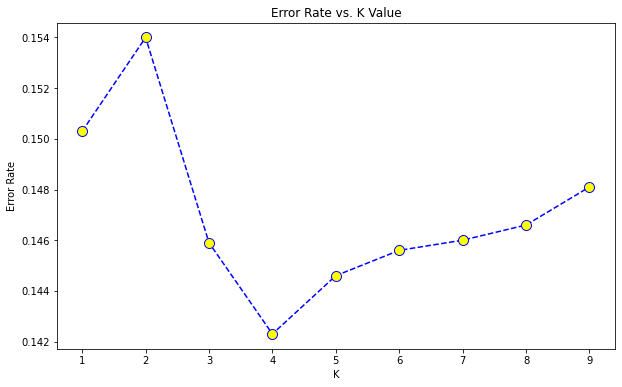

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='yellow', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(train_images2D,train_labels)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
test_pred_knn = knn.predict(test_images2D)
knn_accuracy = round(accuracy_score(test_pred_knn,test_labels) * 100, 2)
print(classification_report(test_pred_knn,test_labels))
print('\n KNN Accuracy: ', knn_accuracy, '%')

              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1176
           1       0.97      0.99      0.98       984
           2       0.83      0.71      0.76      1176
           3       0.87      0.90      0.89       960
           4       0.74      0.80      0.77       928
           5       0.85      0.99      0.92       861
           6       0.55      0.68      0.60       804
           7       0.97      0.88      0.93      1098
           8       0.95      0.98      0.97       970
           9       0.96      0.92      0.94      1043

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000


 KNN Accuracy:  85.77 %


# APPROACH 4: Decision Tree Image Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(train_images2D,train_labels)
y_pred_dtc=dtc.predict(test_images2D)
dtc_accuracy = round(accuracy_score(y_pred_dtc,test_labels)*100, 2)
print(classification_report(y_pred_dtc,test_labels))

print('n Decision Tree Accuracy: ', dtc_accuracy, '%')

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       975
           1       0.95      0.95      0.95       996
           2       0.65      0.64      0.65      1014
           3       0.78      0.81      0.79       964
           4       0.64      0.65      0.64       986
           5       0.89      0.91      0.90       975
           6       0.55      0.52      0.54      1060
           7       0.89      0.87      0.88      1022
           8       0.90      0.90      0.90      1002
           9       0.91      0.90      0.91      1006

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000

n Decision Tree Accuracy:  79.01 %


# APPROACH 5: Naive Bayes Image Classification

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(train_images2D,train_labels)
nb_test_pred=nb.predict(test_images2D)
nb_accuracy = round(accuracy_score(nb_test_pred,test_labels)*100, 2)
print(classification_report(nb_test_pred,test_labels))
print('\n Naive Bayes Accuracy: ', nb_accuracy, '%')

GaussianNB()

              precision    recall  f1-score   support

           0       0.59      0.81      0.68       720
           1       0.94      0.64      0.76      1474
           2       0.32      0.59      0.42       550
           3       0.55      0.44      0.49      1226
           4       0.78      0.38      0.51      2068
           5       0.28      0.93      0.43       300
           6       0.04      0.32      0.07       125
           7       0.99      0.51      0.67      1956
           8       0.71      0.83      0.77       852
           9       0.67      0.91      0.77       729

    accuracy                           0.59     10000
   macro avg       0.59      0.64      0.56     10000
weighted avg       0.74      0.59      0.62     10000


 Naive Bayes Accuracy:  58.56 %


# Compare Results & Performance

In [ ]:
import pandas as pd
# df = pd.DataFrame(np.array(A).reshape(-1,len(A)))
results = pd.DataFrame({'Accuracy':[nn_accuracy, random_forest_accuracy, knn_accuracy, dtc_accuracy, nb_accuracy],
                       'Compute Time':[300, 60, 43, 51, 1]},
  index=['Neural Network', 'Random Forest', 'KNN', 'Decision Tree', 'Naive Bayes'])
results = results.sort_values(by='Accuracy', ascending=False)

results

,Accuracy,Compute Time
Neural Network,88.65,300
Random Forest,88.00,60
KNN,85.77,43
Decision Tree,79.01,51
Naive Bayes,58.56,1


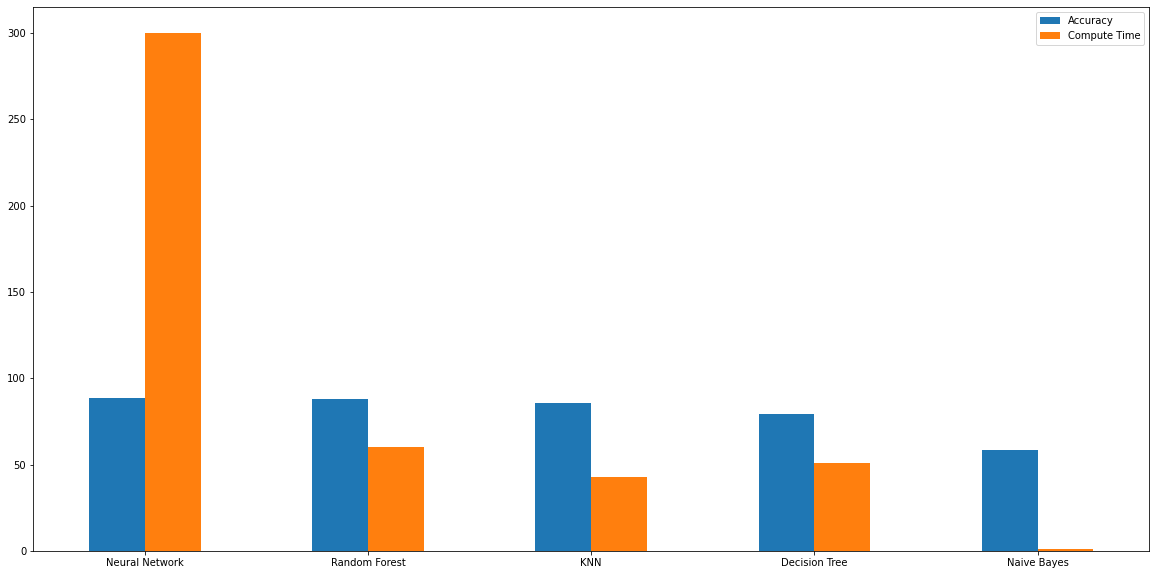

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
results.plot(kind="bar", rot=0)
plt.show();

# Questions
1. What is the accuracy of each method?
  * Neural Network - 88.65% Accuracy
  * Random forest - 88.0% Accuracy
  * KNN - 85.77% Accuracy
  * Decision Tree - 79.01% Accuracy
  * Naive Bayes - 58.56% Accuracy
2. What are the trade-offs of each approach?
  * Neural Networks - best accuracy, but processing time took 5 minutes for 50 epochs
  * Random forest - second best accuracy but compute performance was second worst
  * KNN - second best compute performance and  
  * Decision Tree - second to worst accuracy and middle of the road performance
  * Naive Bayes - fastest performance, lowest accuracy
3. What is the compute performance of each approach?
  * Neural Network - ~5 minutes processing time for 50 epochs 
  * Random Forest - ~1 minute processing time
  * KNN - ~43 seconds processing time
  * Decision Tree - ~51 seconds processing time
  * Naive Bayes - ~1 second processing time